# **Count the number of objects in an image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**USING OPENCV LIBRARIES**

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

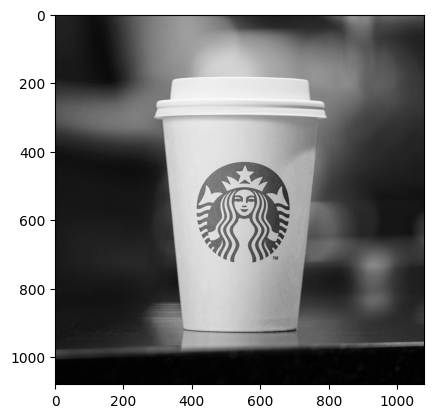

In [ ]:
#image = cv2.imread('/content/drive/MyDrive/UCALGARY PROJECT/final_data/Green/Dirty cardboard burger box_575.jpg')
image = cv2.imread('/content/drive/MyDrive/UCALGARY PROJECT/Refund/Coffee_Cup_With_Lid (2)_717.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

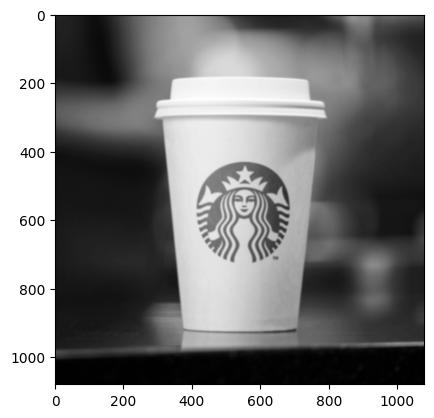

In [ ]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

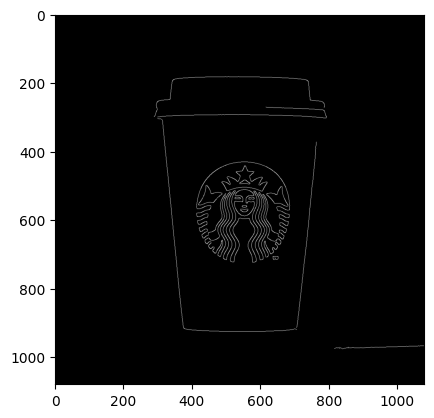

In [ ]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

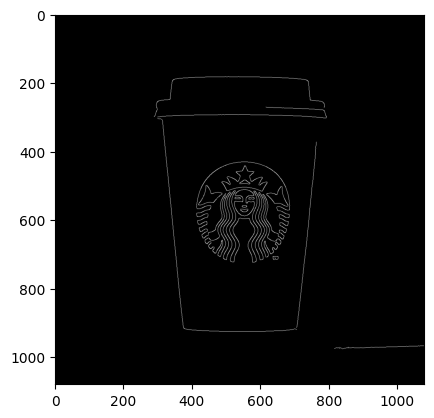

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

array([[[ 25,  54,  34],
        [ 24,  53,  33],
        [ 22,  51,  31],
        ...,
        [131,  79,  32],
        [132,  80,  33],
        [130,  78,  31]],

       [[ 24,  53,  33],
        [ 22,  51,  31],
        [ 21,  50,  30],
        ...,
        [130,  78,  31],
        [131,  79,  32],
        [129,  77,  30]],

       [[ 20,  52,  31],
        [ 18,  50,  29],
        [ 17,  49,  28],
        ...,
        [128,  77,  32],
        [128,  77,  32],
        [126,  75,  30]],

       ...,

       [[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  4,   4,   2]]

In [ ]:
print("number of objects in the image : ", len(cnt))

number of objects in the image :  45


**USING YOLOV4 PRETRAINED NETWORK**

Link: https://www.askpython.com/python/examples/count-objects-in-an-image

In [ ]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=04fdef069274db6bb17272bee4d14030b1b924ae6861d8b762fe047bab4dbc3d
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=3f6e7d313452c5fbf0b088deb7687e0553de83ca0abed383088290173a5671e3
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

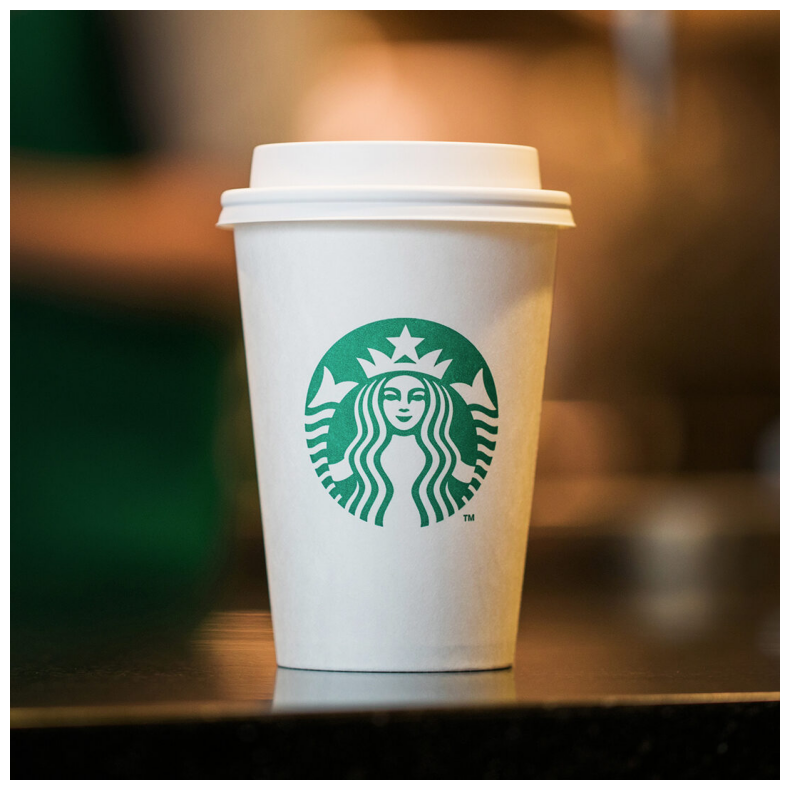

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UCALGARY PROJECT/Refund/Coffee_Cup_With_Lid (2)_717.jpg')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img1)
plt.show()

In [ ]:
box, label, count = cv.detect_common_objects(img)
output = draw_bbox(img, box, label, count)

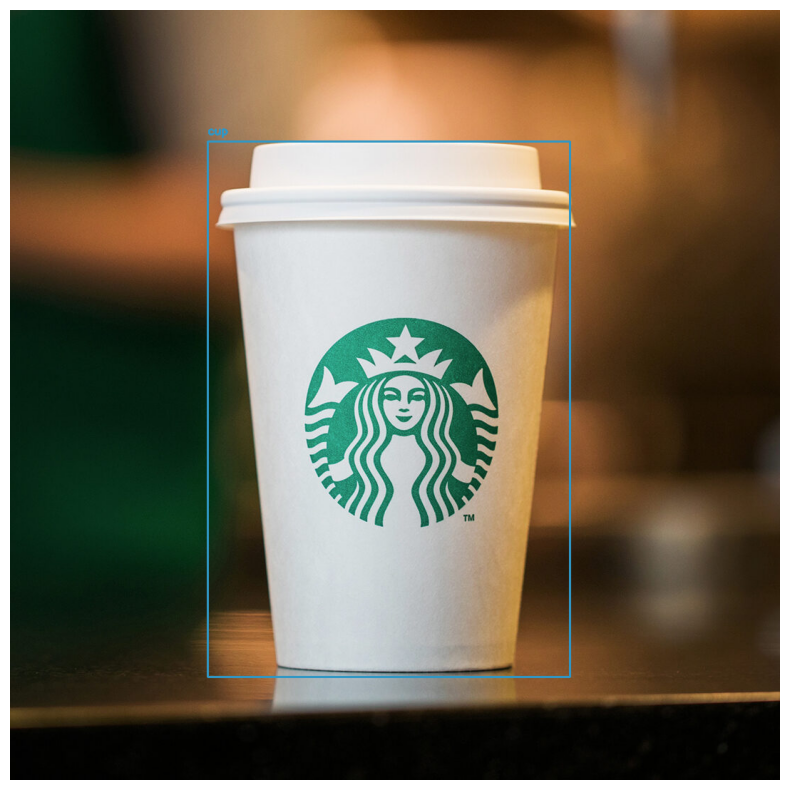

In [ ]:
output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(output)
plt.show()

In [ ]:
print("Number of objects in this image are " +str(len(label)))
print("label: ", str(label))

Number of objects in this image are 1
label:  ['cup']
